In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# **Dataset Load**





In [2]:
transactions = pd.read_csv('creditcard.csv')
transactions.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


# **Check The Type**

In [3]:
transactions.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [4]:
transactions.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,...,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000
mean,8009.996822,-0.216230,0.277097,0.889505,0.282606,-0.086585,0.139986,-0.121943,-0.048727,0.911579,...,-0.061474,-0.153850,-0.033709,0.017113,0.104794,0.062891,0.008320,0.000271,62.352617,0.004349
std,6204.332248,1.583914,1.308884,1.331824,1.478162,1.191776,1.306285,1.153899,1.246823,1.192349,...,0.918705,0.626631,0.505355,0.591394,0.429413,0.561603,0.405100,0.261230,178.247010,0.065803
min,0.000000,-27.670569,-34.607649,-22.804686,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2542.000000,-0.978944,-0.261503,0.417186,-0.622456,-0.688114,-0.622521,-0.591335,-0.185243,0.196741,...,-0.268151,-0.543613,-0.171833,-0.333251,-0.144092,-0.353864,-0.080064,-0.015461,5.000000,0.000000
50%,6662.000000,-0.340742,0.256346,0.951223,0.213029,-0.183847,-0.146903,-0.094876,0.013616,0.894911,...,-0.130062,-0.124900,-0.044299,0.072099,0.143136,0.001972,-0.003039,0.015452,15.950000,0.000000
75%,12382.000000,1.161273,0.883626,1.613678,1.159141,0.346298,0.508432,0.431657,0.267560,1.589120,...,0.021687,0.234029,0.075686,0.401798,0.380076,0.409231,0.106344,0.073171,50.000000,0.000000
max,20642.000000,1.960497,9.092123,4.101716,11.927512,34.099309,21.393069,34.303177,5.499963,10.392889,...,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [5]:
transactions.shape

(11959, 31)

In [6]:
duplicate_rows_df = transactions[transactions.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (44, 31)


In [7]:
transactions.count()

Time      11959
V1        11959
V2        11959
V3        11959
V4        11959
V5        11959
V6        11959
V7        11959
V8        11959
V9        11959
V10       11959
V11       11959
V12       11959
V13       11959
V14       11959
V15       11959
V16       11959
V17       11959
V18       11959
V19       11959
V20       11958
V21       11958
V22       11958
V23       11958
V24       11958
V25       11958
V26       11958
V27       11958
V28       11958
Amount    11958
Class     11958
dtype: int64

In [8]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11959 non-null  int64  
 1   V1      11959 non-null  float64
 2   V2      11959 non-null  float64
 3   V3      11959 non-null  float64
 4   V4      11959 non-null  float64
 5   V5      11959 non-null  float64
 6   V6      11959 non-null  float64
 7   V7      11959 non-null  float64
 8   V8      11959 non-null  float64
 9   V9      11959 non-null  float64
 10  V10     11959 non-null  float64
 11  V11     11959 non-null  float64
 12  V12     11959 non-null  float64
 13  V13     11959 non-null  float64
 14  V14     11959 non-null  float64
 15  V15     11959 non-null  float64
 16  V16     11959 non-null  float64
 17  V17     11959 non-null  float64
 18  V18     11959 non-null  float64
 19  V19     11959 non-null  float64
 20  V20     11958 non-null  float64
 21  V21     11958 non-null  float64
 22

# **Dropping the missing or null values.**

<Axes: >

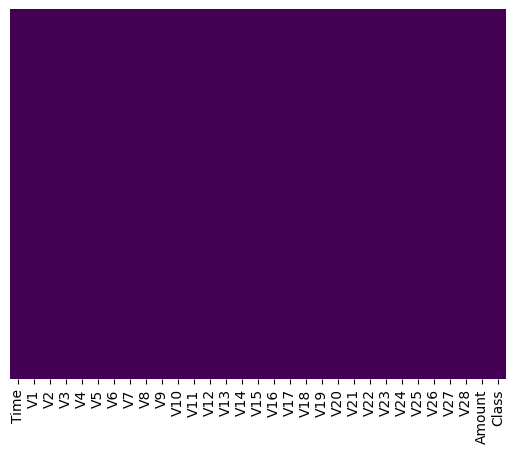

In [9]:
# Heatmap to check missing values
sns.heatmap(transactions.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
df = transactions.dropna()    # Dropping the missing values.
df.count()

Time      11958
V1        11958
V2        11958
V3        11958
V4        11958
V5        11958
V6        11958
V7        11958
V8        11958
V9        11958
V10       11958
V11       11958
V12       11958
V13       11958
V14       11958
V15       11958
V16       11958
V17       11958
V18       11958
V19       11958
V20       11958
V21       11958
V22       11958
V23       11958
V24       11958
V25       11958
V26       11958
V27       11958
V28       11958
Amount    11958
Class     11958
dtype: int64

In [11]:
print(transactions.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


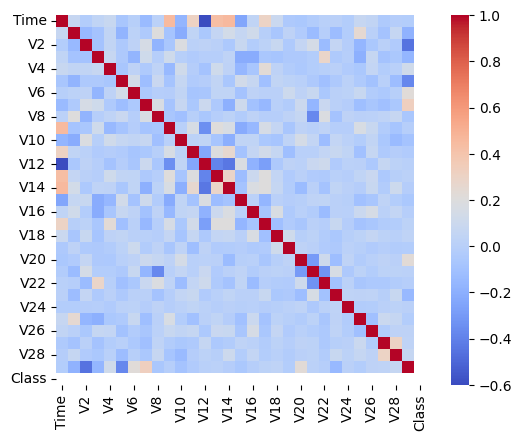

In [12]:
sample = transactions[transactions['Class']==0]
normcorr=  sample.corr()
sns.heatmap(normcorr, cbar = True,  square = True, annot=False, fmt= '.2f',annot_kws={'size': 20},
           cmap= 'coolwarm')
plt.show()

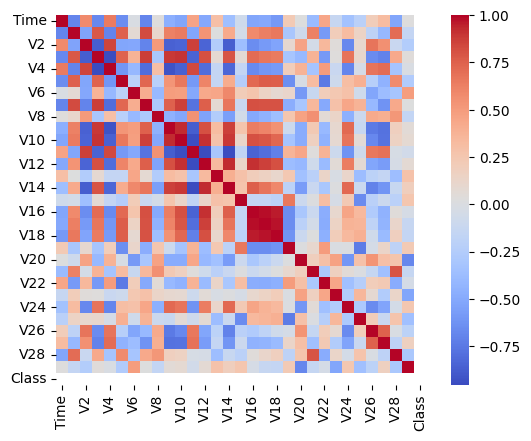

In [13]:
fraud = transactions[transactions['Class']==1]

fraudcorr = fraud.corr()
sns.heatmap(fraudcorr, cbar = True,  square = True, annot=False, fmt= '.2f',annot_kws={'size': 20},
           cmap= 'coolwarm')
plt.show()

V9 - V10


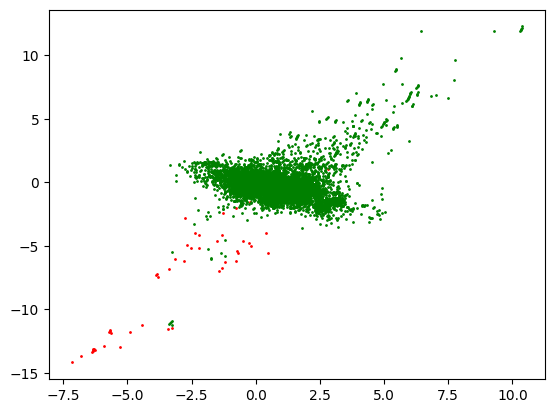

<Figure size 640x480 with 0 Axes>

In [14]:
print('V9 - V10')
plt.scatter(fraud['V9'], fraud['V10'],s=1, color='r')
plt.scatter(sample['V9'], sample['V10'], s=1, color='g')
plt.show()
plt.clf()

V16-V17


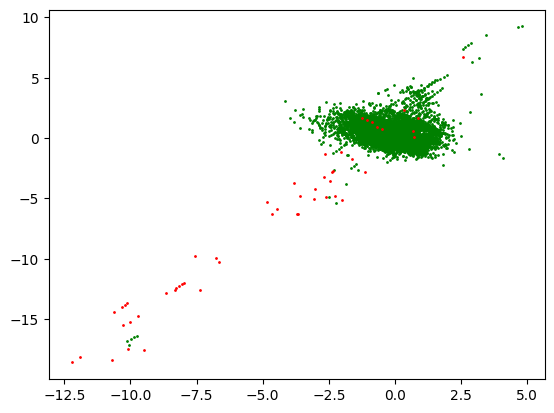

<Figure size 640x480 with 0 Axes>

In [15]:
print('V16-V17')
plt.scatter(sample['V16'], sample['V17'], s=1, color = 'g')
plt.scatter(fraud['V16'], fraud['V17'], s=1, color = 'r')
plt.show()
plt.clf()

V17 - V18


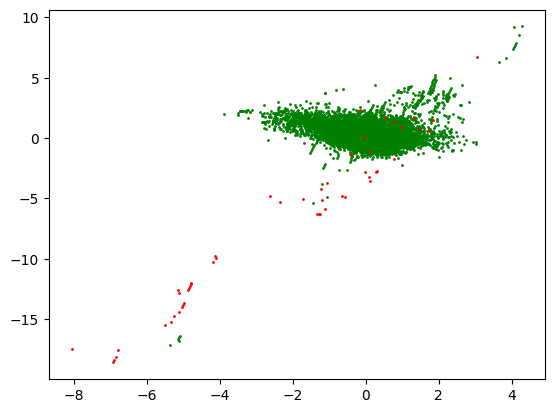

<Figure size 640x480 with 0 Axes>

In [16]:
print('V17 - V18')
plt.scatter(sample['V18'], sample['V17'], s=1, color = 'g')
plt.scatter(fraud['V18'], fraud['V17'], s=1, color = 'r')
plt.show()
plt.clf()

V1 - V3


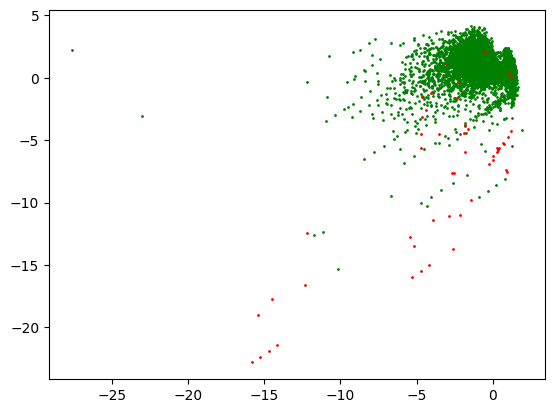

<Figure size 640x480 with 0 Axes>

In [17]:
print('V1 - V3')
plt.scatter(sample['V1'], sample['V3'], s=1, color = 'g')
plt.scatter(fraud['V1'], fraud['V3'], s=1, color = 'r')
plt.show()
plt.clf()

V1 - V2


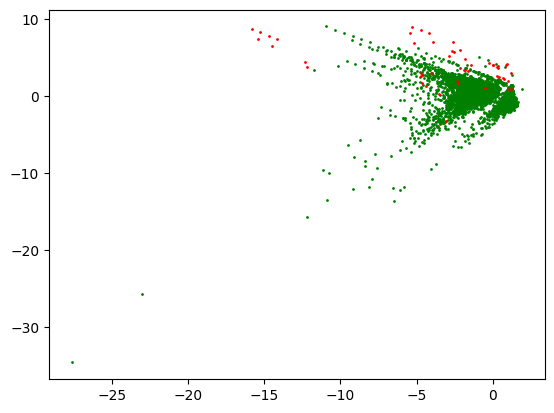

<Figure size 640x480 with 0 Axes>

In [18]:
print('V1 - V2')
plt.scatter(sample['V1'], sample['V2'], s=1, color = 'g')
plt.scatter(fraud['V1'], fraud['V2'], s=1, color = 'r')
plt.show()
plt.clf()

In [19]:
transactions = transactions[['Class', 'V9', 'V10', 'V16', 'V17', 'V18','Amount']]


sample = transactions[transactions['Class']==0]
sample.head()


,Class,V9,V10,V16,V17,V18,Amount
0,0.0,0.363787,0.090794,-0.470401,0.207971,0.025791,149.62
1,0.0,-0.255425,-0.166974,0.463917,-0.114805,-0.183361,2.69
2,0.0,-1.514654,0.207643,-2.890083,1.109969,-0.121359,378.66
3,0.0,-1.387024,-0.054952,-1.059647,-0.684093,1.965775,123.50
4,0.0,0.817739,0.753074,-0.451449,-0.237033,-0.038195,69.99


In [20]:
fraud = transactions[transactions['Class'] == 1]
fraud

,Class,V9,V10,V16,V17,V18,Amount
541,1.0,-2.770089,-2.772272,-1.140747,-2.830056,-0.016822,0.00
623,1.0,-0.270953,-0.838587,0.666780,0.599717,1.725321,529.00
4920,1.0,-0.238253,-1.525412,-2.282194,-4.781831,-2.615665,239.93
6108,1.0,-0.247768,-4.801637,-7.358083,-12.598419,-5.131549,59.00
6329,1.0,-1.282858,-2.447469,2.581851,6.739384,3.042493,1.00
6331,1.0,-2.795892,-6.187891,-2.041974,-1.129056,0.116453,1.00
6334,1.0,-3.139409,-6.045468,-1.638960,-1.746350,0.776744,1.00
6336,1.0,-2.214311,-5.134454,-0.871688,1.313014,0.773914,1.00
6338,1.0,-2.678679,-4.959493,-0.502362,0.784427,1.494305,1.00
6427,1.0,-0.486097,-4.624985,-3.599540,-4.830324,-0.649090,1.00


In [21]:
ignore_me, sample = train_test_split(sample, test_size = 0.01)

In [22]:
import warnings

In [23]:
warnings.filterwarnings("ignore")

sample = pd.concat([sample, fraud])

In [24]:
train, test = train_test_split(sample, test_size = 0.3)

trainy = train['Class']
testy = test['Class']
train.drop('Class', 1, inplace = True)
test.drop('Class', 1, inplace = True)

In [25]:
scaler = StandardScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [26]:
clf = SVC()
clf.fit(train, trainy)
outcome = list(clf.predict(test))
testy = list(testy)

In [27]:
count = 0
falsepos = 0
truepos = 1
falseneg = 0
trueneg = 0


for i in range (1,len(testy)):
    if (outcome[i]==1):
        if (testy[i] == 1):
            truepos = truepos + 1
        else:
            falsepos = falsepos + 1
    else:
        if (testy[i] == 0):
            trueneg = trueneg + 1
        else:
            falseneg = falseneg  +1
    count = count + 1

In [28]:
precision = truepos / (truepos + falsepos)
recall = truepos / (truepos + falseneg)
F1 = 2*((precision * recall ) / (precision + recall))

print("Precision = " + str(precision))
print("Recall = " + str(recall))
print("F1 = " + str(F1))

Precision = 1.0
Recall = 0.8888888888888888
F1 = 0.9411764705882353


In [29]:
fraud = transactions[transactions['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only '+ str(fraud) + ' frauds where the amount was bigger than 1000 over ' + str(transactions.shape[0]) + ' frauds')

There are only 60 frauds where the amount was bigger than 1000 over 11959 frauds


In [30]:
number_fraud = len(transactions[transactions.Class == 1])
number_no_fraud = len(transactions[transactions.Class == 0])
print('There are only '+ str(number_fraud) + ' frauds in the original dataset, even though there are ' + str(number_no_fraud) +' no frauds in the dataset.')

There are only 52 frauds in the original dataset, even though there are 11906 no frauds in the dataset.


In [31]:
print("The accuracy of the classifier then would be : "+ str((5970-1)/5970))

The accuracy of the classifier then would be : 0.9998324958123953
